In [1]:
import cv2
import itertools
import torch
import json

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from PIL import Image
from torchvision.transforms import ToTensor
from sklearn.metrics.pairwise import cosine_similarity

from models.mtcnn import MTCNN
from models.inception_resnet_v1 import InceptionResnetV1
from tqdm.notebook import tqdm

In [2]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()
resnet.to('cuda')

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [3]:
data_dir = Path("/home/matt/datasets/vgg_face_v2/cropped/")

In [4]:
def plot_pairwise_score(model, pair):
    imgs_embeddings = list()
    imgs = list()
    #f, ax = plt.subplots(nrows=1, ncols=2)
    
    for img_path in pair:
       
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (160,160))
        imgs.append(img)
        img = np.array(img)
        img = ToTensor()(img)
        
        model.classify = False
        img_embedding = model(img.unsqueeze(0).to('cuda'))
        imgs_embeddings.append(img_embedding.detach().cpu().numpy())

    verification_score = cosine_similarity(imgs_embeddings[0], imgs_embeddings[1])[0][0]
    
#     f.suptitle(f"Verif score = {verification_score:.5f}")
#     ax[0].imshow(imgs[0])
#     ax[1].imshow(imgs[1])
    
#     return ax
    return {'images': imgs, 'verification_score': verification_score, 'images_paths':pair}

In [ ]:
mated_pairs = dict()

#stopped on cropped_n001256
for directory in sorted(list(data_dir.iterdir()))[128:]:
    annotations = {}
    directory_name = directory.parts[-1]
    print(f"Processing {directory_name}")
    if not directory_name in annotations.keys():
        annotations[directory_name] = list()
        
    filenames = list(directory.iterdir())
    pairwise_filenames = sorted(list(itertools.combinations(filenames, 2))) 
    
    for i in tqdm(range(len(pairwise_filenames))):
#     for i in tqdm(range(len(filenames))):
        pair = pairwise_filenames[i]
        paired_images_filenames = [p.parts[-1] for p in pair]

        element = plot_pairwise_score(resnet, pair)
        mated_pairs[i] = element
        annotations[directory_name].append({'images': paired_images_filenames, 
                                            'verification_score':format(element['verification_score'], ".4f")})
    with open(Path(directory, 'annotations.json'), 'w') as outfile:
        json.dump(annotations, outfile)

Processing cropped_n001256


  0%|          | 0/92235 [00:00<?, ?it/s]

Processing cropped_n001275


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001277


  0%|          | 0/29403 [00:00<?, ?it/s]

Processing cropped_n001288


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001291


  0%|          | 0/125751 [00:00<?, ?it/s]

Processing cropped_n001293


  0%|          | 0/46056 [00:00<?, ?it/s]

Processing cropped_n001296


  0%|          | 0/45451 [00:00<?, ?it/s]

Processing cropped_n001299


  0%|          | 0/27966 [00:00<?, ?it/s]

Processing cropped_n001302


  0%|          | 0/52326 [00:00<?, ?it/s]

Processing cropped_n001303


  0%|          | 0/51040 [00:00<?, ?it/s]

Processing cropped_n001304


  0%|          | 0/35778 [00:00<?, ?it/s]

Processing cropped_n001337


  0%|          | 0/21115 [00:00<?, ?it/s]

Processing cropped_n001341


  0%|          | 0/34716 [00:00<?, ?it/s]

Processing cropped_n001354


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001368


  0%|          | 0/163306 [00:00<?, ?it/s]

Processing cropped_n001374


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001398


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001401


  0%|          | 0/67896 [00:00<?, ?it/s]

Processing cropped_n001418


  0%|          | 0/101475 [00:00<?, ?it/s]

Processing cropped_n001430


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001437


  0%|          | 0/44850 [00:00<?, ?it/s]

Processing cropped_n001439


  0%|          | 0/80200 [00:00<?, ?it/s]

Processing cropped_n001446


  0%|          | 0/77815 [00:00<?, ?it/s]

Processing cropped_n001467


  0%|          | 0/23436 [00:00<?, ?it/s]

Processing cropped_n001485


  0%|          | 0/95266 [00:00<?, ?it/s]

Processing cropped_n001511


  0%|          | 0/44850 [00:00<?, ?it/s]

In [6]:
annotations

{'cropped_n006659': [{'images': ['0001_01.jpg', '0002_02.jpg'],
   'verification_score': 0.8740524},
  {'images': ['0001_01.jpg', '0003_01.jpg'], 'verification_score': 0.8730962},
  {'images': ['0001_01.jpg', '0005_01.jpg'], 'verification_score': 0.82191205},
  {'images': ['0001_01.jpg', '0008_01.jpg'], 'verification_score': 0.90328693},
  {'images': ['0001_01.jpg', '0009_01.jpg'], 'verification_score': 0.8529669},
  {'images': ['0001_01.jpg', '0011_01.jpg'], 'verification_score': 0.8130106},
  {'images': ['0001_01.jpg', '0013_01.jpg'], 'verification_score': 0.87652016},
  {'images': ['0001_01.jpg', '0014_02.jpg'], 'verification_score': 0.8839687},
  {'images': ['0001_01.jpg', '0015_01.jpg'], 'verification_score': 0.8400742},
  {'images': ['0001_01.jpg', '0018_01.jpg'], 'verification_score': 0.644122},
  {'images': ['0001_01.jpg', '0021_01.jpg'], 'verification_score': 0.8648404},
  {'images': ['0001_01.jpg', '0028_01.jpg'], 'verification_score': 0.77811295},
  {'images': ['0001_01.jpg'

In [77]:
max_key = 0
max_score = 0
for k in mated_pairs:
    elem = mated_pairs[k]
    score = elem['verification_score']
    
    if score > max_score:
        max_key = k
        max_score = score

min_key = 0
min_score = 100
for k in mated_pairs:
    elem = mated_pairs[k]
    score = elem['verification_score']
    
    if score < min_score:
        min_key = k
        min_score = score
    

In [78]:
print(max_key, max_score)
print(min_key, min_score)

130 0.90821755
230 0.029265018


In [79]:
mated_pairs[max_key]['images_paths']

(PosixPath('/home/matt/datasets/vgg_face_v2/cropped/cropped_n000969/0002_01.jpg'),
 PosixPath('/home/matt/datasets/vgg_face_v2/cropped/cropped_n000969/0037_01.jpg'))

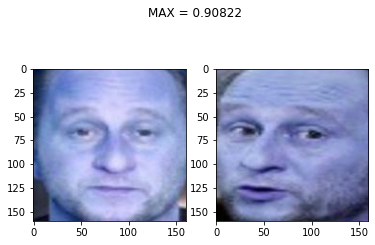

In [80]:
pair = mated_pairs[max_key]
f, ax = plt.subplots(nrows=1, ncols=2)
f.suptitle(f"MAX = {pair['verification_score']:.5f}")
ax[0].imshow(pair['images'][0])
ax[1].imshow(pair['images'][1])

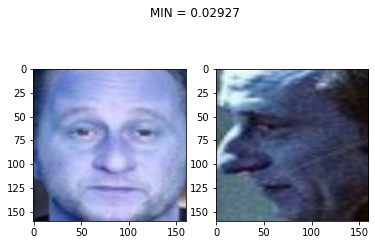

In [81]:
pair = mated_pairs[min_key]
f, ax = plt.subplots(nrows=1, ncols=2)
f.suptitle(f"MIN = {pair['verification_score']:.5f}")
ax[0].imshow(pair['images'][0])
ax[1].imshow(pair['images'][1])